In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from shapely.ops import cascaded_union, polygonize
from scipy.spatial import Delaunay

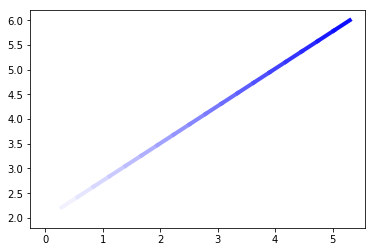

In [22]:
def plot_gradient_hack( p0, p1, npts=20, cmap=None, **kw):
    """
    Draw a gradient between p0 and p1 using a colormap
    The **kw dictionary gets passed to plt.plot, so things like linestyle,
    linewidth, labels, etc can be modified directly.
    """
    x_1, y_1 = p0
    x_2, y_2 = p1
    
    X = np.linspace(x_1, x_2, npts)
    Xs = X[:-1]
    Xf = X[1:]
    Xpairs = zip(Xs, Xf)
    
    Y = np.linspace(y_1, y_2, npts)
    Ys = Y[:-1]
    Yf = Y[1:]
    Ypairs = zip(Ys, Yf)

    C = np.linspace(0,1, npts)
    cmap = plt.get_cmap(cmap)
    # the simplest way of doing this is to just do the following:
    for x, y, c in zip(Xpairs, Ypairs, C):
        plt.plot(x, y, '-', c=cmap(c), **kw)

    # But for cases when that  will be too slow, you can make this go faster,
    # follow along with this example:
    # http://matplotlib.org/examples/pylab_examples/line_collection2.html


def plot_gradient_rbg_pairs(p0, p1, rgb0, rgb1, **kw):
    """Form the gradient from RGB values at each point
    The **kw dictionary gets passed to plt.plot, so things like linestyle,
    linewidth, labels, etc can be modified directly.
    """
    cmap = LinearSegmentedColormap.from_list('tmp', (rgb0, rgb1))
    plot_gradient_hack(p0, p1, cmap=cmap, **kw)

# plot gradient that just spans the full colormap
#plot_gradient_hack( (1,2), (5,6) )

# we can specify the colormap, and set some properties for the plot
#plot_gradient_hack( (2,5), (5,3), cmap='bwr', linewidth=3.)

# We also have a simple wrapper to specify the two rgb points to interpolate
# the gradient between
#plot_gradient_rbg_pairs( (1.1,2), (5.1,6), (0,0,0), (1,1,1) ) # black to white
#plot_gradient_rbg_pairs( (1.2,2), (5.2,6), (0,0,0), (0,0,1),  # black to blue
#                         linestyle='--', linewidth=9) 

#0 - (1,0,0)
#30- (0,0,1)

plot_gradient_rbg_pairs( (0,2), (5.3,6), (1,1,1), (0,0,1),  # red to green
                         linewidth=4 )

plt.show()

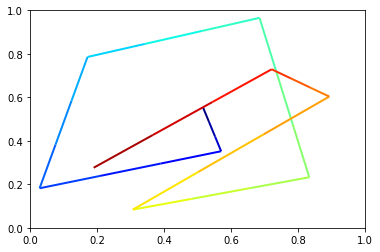

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll
import matplotlib.path as mpath

def colorline(
    x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc


def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

N = 10
np.random.seed(101)
x = np.random.rand(N)
y = np.random.rand(N)
fig, ax = plt.subplots()

path = mpath.Path(np.column_stack([x, y]))
verts = path.interpolated(steps=3).vertices
x, y = verts[:, 0], verts[:, 1]
z = np.linspace(0, 1, len(x))
colorline(x, y, z, cmap=plt.get_cmap('jet'), linewidth=2)

plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


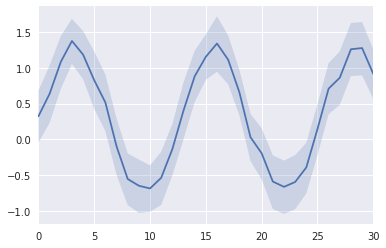

In [26]:
import numpy as np; np.random.seed(22)
import seaborn as sns; sns.set(color_codes=True)
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31)+ np.random.randn(10, 1)
ax = sns.tsplot(data=data)


In [27]:
gammas = sns.load_dataset("gammas")

In [32]:
type(gammas)
gammas.tail(20)

,timepoint,ROI,subject,BOLD signal
5980,10.0,V1,0,1.189647
5981,10.0,V1,1,-0.373356
5982,10.0,V1,2,1.315491
5983,10.0,V1,3,2.877430
5984,10.0,V1,4,1.855887
5985,10.0,V1,5,-2.164599
5986,10.0,V1,6,0.226421
5987,10.0,V1,7,-1.679226
5988,10.0,V1,8,1.854218
5989,10.0,V1,9,-1.304160


In [41]:
def alpha_shape(points, alpha):
    """
    Compute the alpha shape (concave hull) of a set
    of points.
    @param points: Iterable container of points.
    @param alpha: alpha value to influence the
        gooeyness of the border. Smaller numbers
        don't fall inward as much as larger numbers.
        Too large, and you lose everything!
    """
    if len(points) < 4:
        # When you have a triangle, there is no sense
        # in computing an alpha shape.
        return geometry.MultiPoint(list(points)).convex_hull
    def add_edge(edges, edge_points, coords, i, j):
        """
        Add a line between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
                # already added
            return
        edges.add( (i, j) )
        edge_points.append(coords[ [i, j] ])

    coords = np.array([point.coords[0]
                       for point in points])
    tri = Delaunay(coords)
    edges = set()
    edge_points = []
    # loop over triangles:
    # ia, ib, ic = indices of corner points of the
    # triangle
    for ia, ib, ic in tri.vertices:
        pa = coords[ia]
        pb = coords[ib]
        pc = coords[ic]
        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)
        # Semiperimeter of triangle
        s = (a + b + c)/2.0
        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        circum_r = a*b*c/(4.0*area)
        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0/alpha:
            add_edge(edges, edge_points, coords, ia, ib)
            add_edge(edges, edge_points, coords, ib, ic)
            add_edge(edges, edge_points, coords, ic, ia)
    m = geometry.MultiLineString(edge_points)
    triangles = list(polygonize(m))
    return cascaded_union(triangles), edge_points

In [ ]:
for i in range(9):
    alpha = (i+1)*.1
    concave_hull, edge_points = alpha_shape(new_points,
                                            alpha=alpha)
    #print concave_hull
    lines = LineCollection(edge_points)
    pl.figure(figsize=(10,10))
    pl.title('Alpha={0} Delaunay triangulation'.format(
        alpha))
    pl.gca().add_collection(lines)
    delaunay_points = np.array([point.coords[0]
                                for point in new_points])
    pl.plot(delaunay_points[:,0], delaunay_points[:,1],
            'o', hold=1, color='#f16824')

    _ = plot_polygon(concave_hull)
    _ = pl.plot(x,y,'o', color='#f16824')